In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
# import csv
from pathlib import Path

path_cost = Path.cwd().parent / 'data' / '研究開発費' 
path_worker = Path.cwd().parent / 'data' / '産業別、売上高経常利益率別常時従業者数' 
path_patent = Path.cwd().parent / 'data' / '特許件数' 

In [4]:
files_cost = [f.name for f in path_cost.iterdir() if f.is_file()]
files_cost = sorted(files_cost)

files_worker = [f.name for f in path_worker.iterdir() if f.is_file()]
files_worker = sorted(files_worker)

files_patent = [f.name for f in path_patent.iterdir() if f.is_file()]
files_patent = sorted(files_patent)

In [5]:
print('研究開発費:\n', files_cost)
print('産業別、売上高経常利益率別常時従業者数:\n', files_worker)
print('特許件数:\n', files_patent)

研究開発費:
 ['2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv', '2020.csv', '2021.csv', '2022.csv', '2023.csv']
産業別、売上高経常利益率別常時従業者数:
 ['2003.csv', '2004.csv', '2005.csv', '2006.csv', '2007.csv', '2008.csv', '2009.csv', '2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv', '2020.csv', '2021.csv']
特許件数:
 ['2003.csv', '2004.csv', '2005.csv', '2006.csv', '2007.csv', '2008.csv', '2009.csv', '2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv', '2020.csv', '2021.csv', '2022.csv', '2023.csv']


In [6]:
df_list_cost = []
df_list_worker = []
df_list_patent = []

for file in files_cost:
    year = Path(file).stem  # ファイル名から拡張子を除いた部分（'2020'など）
    df = pd.read_csv(path_cost / file)
    df = df.drop(columns=['Unnamed: 0'], axis=1)  # 不要な列を削除
    df['year'] = int(year)
    globals()[f"df_cost_{year}"] = df
    df_list_cost.append(df)

for file in files_worker:
    year = Path(file).stem  # ファイル名から拡張子を除いた部分（'2020'など）
    df = pd.read_csv(path_worker / file)
    df = df.drop(columns=['Unnamed: 0'], axis=1)  # 不要な列を削除
    df['year'] = int(year)
    globals()[f"df_worker_{year}"] = df
    df_list_worker.append(df)

for file in files_patent:
    year = Path(file).stem  # ファイル名から拡張子を除いた部分（'2020'など）
    df = pd.read_csv(path_patent / file)
    df = df.drop(columns=['Unnamed: 0'], axis=1)  # 不要な列を削除
    df['year'] = int(year)
    globals()[f"df_patent_{year}"] = df
    df_list_patent.append(df)

In [7]:
df_cost_2010.head()

,産業,企業数,研究開発_売上高（百万円）,研究開発_研究開発費_計,研究開発_研究開発費_自社研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）,研究開発_売上高研究開発費比率（％）,研究開発_受託研究費（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,研究開発投資_企業数,研究開発投資_当期取得額（百万円）,能力開発_企業数,能力開発_能力開発費（百万円）,year
0,総合計,8068.0,299536235.0,10438431.0,8893697.0,1544734.0,669247.0,77407.0,3.48,418136.0,125969.0,9636.0,1771.0,476616.0,7645,376301.0,2010
1,合計,7909.0,290389660.0,10391978.0,8864962.0,1527016.0,668768.0,77400.0,3.58,417167.0,125708.0,9636.0,1750.0,473123.0,7306,371345.0,2010
2,鉱業、採石業、砂利採取業,7.0,NaN,NaN,NaN,NaN,470.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,9,NaN,2010
3,製造業,6101.0,209652609.0,9548493.0,8205540.0,1342953.0,648434.0,72595.0,4.55,257652.0,45464.0,1159.0,1518.0,438009.0,3489,289566.0,2010
4,090食料品製造業,676.0,12609629.0,147598.0,134512.0,13086.0,1670.0,1965.0,1.17,1553.0,505.0,NaN,113.0,10035.0,354,4236.0,2010


In [8]:
# 産業の大分類の指定
industry = df_cost_2010['産業'].unique()
industry

array(['総合計', '合計', '鉱業、採石業、砂利採取業', '製造業', '090食料品製造業', '091畜産食料品製造業',
       '092水産食料品製造業', '093精穀・製粉業', '099その他の食料品製造業', '100飲料・たばこ・飼料製造業',
       '101清涼飲料・酒類・茶・たばこ製造業', '102飼料・有機質肥料製造業', '110繊維工業',
       '111製糸，紡績，ねん糸等製造業', '112織物・ニット生地製造業', '113染色整理業', '114その他の繊維工業',
       '115織物・ニット製衣服製造業', '119身の回り品・その他の繊維製品製造業', '120木材・木製品製造業（家具を除く）',
       '121製材・合板製造業', '129その他の木製品製造業（家具を除く）', '130家具・装備品製造業',
       '140パルプ・紙・紙加工品製造業', '141パルプ・紙製造業', '142紙加工品製造業', '150印刷・同関連業',
       '160化学工業', '161化学肥料・無機化学工業製品製造業', '162有機化学工業製品製造業',
       '163油脂加工製品等（注）', '164医薬品製造業', '169その他の化学工業製品製造業',
       '170石油製品・石炭製品製造業', '171石油精製業', '179その他の石油製品・石炭製品製造業',
       '180プラスチック製品製造業', '190ゴム製品製造業', '191タイヤ・チューブ製造業', '199その他のゴム製品製造業',
       '200なめし革・同製品・毛皮製造業', '210窯業・土石製品製造業', '211ガラス・同製品製造業',
       '212セメント・同製品製造業', '219その他の窯業・土石製品製造業', '220鉄鋼業', '221銑鉄・粗鋼・鋼材製造業',
       '222鋳鍛造品・その他の鉄鋼製品製造業', '230非鉄金属製造業', '231非鉄金属製錬・精製業',
       '232非鉄金属加工品製造業', '240金属製品製造業', '241建設用・建築用金属製品製造業',
       '249その他

In [9]:
industry_large = [
    #'鉱業、採石業、砂利採取業',
    '製造業',
    '電気・ガス業',
    '情報通信業',
    '卸売業',
    '小売業',
    #'クレジットカード業、割賦金融業',
    #'物品賃貸業',
    '学術研究、専門・技術サービス業',
    '飲食サービス業',
    '生活関連サービス業、娯楽業',
    #'個人教授所',
    'サービス業（その他のサービス業）',
    'その他の産業'
]

In [10]:
df_cost_2010_large = df_cost_2010[df_cost_2010['産業'].isin(industry_large)]

In [11]:
df_cost_2010_large['企業数'].sum()

7941.0

In [12]:
df_cost_2010.iloc[1,1]

7909.0

In [13]:
# 列名を統一する
reference_columns = df_cost_2010.columns

for i in range(1, len(df_list_cost)):
    df_list_cost[i].columns = reference_columns

In [14]:
panel_cost  = pd.concat(df_list_cost, ignore_index=True)
panel_cost

,産業,企業数,研究開発_売上高（百万円）,研究開発_研究開発費_計,研究開発_研究開発費_自社研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）,研究開発_売上高研究開発費比率（％）,研究開発_受託研究費（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,研究開発投資_企業数,研究開発投資_当期取得額（百万円）,能力開発_企業数,能力開発_能力開発費（百万円）,year
0,総合計,8068,2.99536e+08,1.04384e+07,8.8937e+06,1.54473e+06,669247,77407,3.48,418136,125969,9636,1771,476616,7645,376301,2010
1,合計,7909,2.9039e+08,1.0392e+07,8.86496e+06,1.52702e+06,668768,77400,3.58,417167,125708,9636,1750,473123,7306,371345,2010
2,鉱業、採石業、砂利採取業,7,NaN,NaN,NaN,NaN,470,NaN,NaN,NaN,NaN,NaN,1,NaN,9,NaN,2010
3,製造業,6101,2.09653e+08,9.54849e+06,8.20554e+06,1.34295e+06,648434,72595,4.55,257652,45464,1159,1518,438009,3489,289566,2010
4,090食料品製造業,676,1.26096e+07,147598,134512,13086,1670,1965,1.17,1553,505,NaN,113,10035,354,4236,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,ディスプレイ業,2,NaN,NaN,NaN,***,***,***,NaN,***,***,***,***,***,6,70,2023
2231,テレマーケティング業,4,70839,154,105,49,***,***,0.22,***,***,***,***,***,26,577,2023
2232,その他の事業サービス業,47,NaN,NaN,NaN,7315,405,***,NaN,292,260,***,3,59,237,3251,2023
2233,サービス業（その他のサービス業）,80,3863125,204683,189146,15537,1086,1011,5.3,8079,485,6861,23,10362,254,4270,2023


In [15]:
for df in df_list_cost:
    print(len(df))

159
160
159
159
160
160
160
160
160
159
159
159
160
161


In [16]:
panel_cost_large = panel_cost[panel_cost['産業'].isin(industry_large)]
panel_cost_large

,産業,企業数,研究開発_売上高（百万円）,研究開発_研究開発費_計,研究開発_研究開発費_自社研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）,研究開発_売上高研究開発費比率（％）,研究開発_受託研究費（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,研究開発投資_企業数,研究開発投資_当期取得額（百万円）,能力開発_企業数,能力開発_能力開発費（百万円）,year
3,製造業,6101,2.09653e+08,9.54849e+06,8.20554e+06,1.34295e+06,648434,72595,4.55,257652,45464,1159,1518,438009,3489,289566,2010
81,電気・ガス業,31,1.85383e+07,134873,49345,85528,3868,NaN,0.73,8322,6,NaN,14,5915,60,18718,2010
84,情報通信業,494,9.23255e+06,130391,96892,33499,1722,595,1.41,23055,2418,8266,29,861,883,22963,2010
91,卸売業,826,4.12856e+07,501495,452865,48630,9801,2781,1.21,8240,670,7,129,24743,1209,17520,2010
110,小売業,140,4.26721e+06,10196,8112,2084,1031,NaN,0.24,371,353,NaN,13,265,862,11271,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,学術研究、専門・技術サービス業,179,5711155,265663,243869,21794,1656,11674,4.65,160062,18896,3801,45,27055,298,6016,2023
2210,飲食サービス業,82,758478,589,551,38,37,***,0.08,***,***,***,1,NaN,128,1187,2023
2213,生活関連サービス業、娯楽業,13,228613,260,222,38,***,23,0.11,***,***,***,***,***,165,1648,2023
2233,サービス業（その他のサービス業）,80,3863125,204683,189146,15537,1086,1011,5.3,8079,485,6861,23,10362,254,4270,2023


In [17]:
panel_cost_large.groupby('year').size()

year
2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
2016    10
2017    10
2018    10
2019    10
2020    10
2021    10
2022    10
2023    10
dtype: int64

In [18]:
print('研究開発_売上高（百万円）:', panel_cost_large['研究開発_売上高（百万円）'].isna().sum())
panel_cost_large[panel_cost_large['研究開発_売上高（百万円）'].isna()]

研究開発_売上高（百万円）: 1


,産業,企業数,研究開発_売上高（百万円）,研究開発_研究開発費_計,研究開発_研究開発費_自社研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）,研究開発_売上高研究開発費比率（％）,研究開発_受託研究費（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,研究開発投資_企業数,研究開発投資_当期取得額（百万円）,能力開発_企業数,能力開発_能力開発費（百万円）,year
457,生活関連サービス業、娯楽業,8,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,98,1111,2012


In [19]:
panel_cost_large['研究開発_研究開発費_計'] = pd.to_numeric(panel_cost_large['研究開発_研究開発費_計'], errors='coerce')

<ipython-input-19-5d7c0f881d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_cost_large['研究開発_研究開発費_計'] = pd.to_numeric(panel_cost_large['研究開発_研究開発費_計'], errors='coerce')


In [20]:
panel_cost_large['企業数'] = pd.to_numeric(panel_cost_large['企業数'], errors='coerce')

<ipython-input-20-f8e26d2a7413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_cost_large['企業数'] = pd.to_numeric(panel_cost_large['企業数'], errors='coerce')


In [21]:
panel_cost_large['研究開発_売上高（百万円）'] = pd.to_numeric(panel_cost_large['研究開発_売上高（百万円）'], errors='coerce')

<ipython-input-21-ab401b7f31bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_cost_large['研究開発_売上高（百万円）'] = pd.to_numeric(panel_cost_large['研究開発_売上高（百万円）'], errors='coerce')


In [22]:
panel_cost_large['研究開発_研究開発費_計'].map(type).value_counts()

<class 'float'>    140
Name: 研究開発_研究開発費_計, dtype: int64

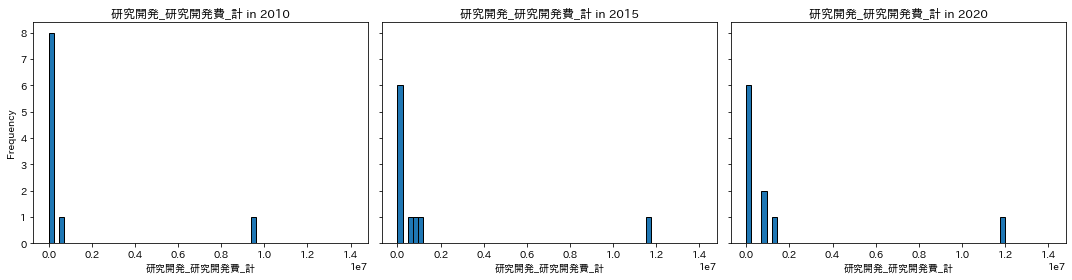

In [23]:
years = [2010, 2015, 2020]
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# 全体の min/max を使って x 軸を統一
xmin = panel_cost_large['研究開発_研究開発費_計'].min()
xmax = panel_cost_large['研究開発_研究開発費_計'].max()

# 各年ごとにヒストグラムを描画
for i, year in enumerate(years):
    subset = panel_cost_large[panel_cost_large['year'] == year]
    
    axes[i].hist(subset['研究開発_研究開発費_計'], bins=60, edgecolor='black', range=(xmin, xmax))
    axes[i].set_title(f'研究開発_研究開発費_計 in {year}')
    axes[i].set_xlabel('研究開発_研究開発費_計')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
panel_cost_large[panel_cost_large['year'] == 2010][['産業', '研究開発_研究開発費_計', 'year']]

,産業,研究開発_研究開発費_計,year
3,製造業,9548493.0,2010
81,電気・ガス業,134873.0,2010
84,情報通信業,130391.0,2010
91,卸売業,501495.0,2010
110,小売業,10196.0,2010
126,学術研究、専門・技術サービス業,50286.0,2010
135,飲食サービス業,854.0,2010
138,生活関連サービス業、娯楽業,1000.0,2010
157,サービス業（その他のサービス業）,10670.0,2010
158,その他の産業,35783.0,2010


In [25]:
panel_cost_large[panel_cost_large['year'] == 2015][['産業', '研究開発_研究開発費_計', 'year']]

,産業,研究開発_研究開発費_計,year
800,製造業,11530426.0,2015
878,電気・ガス業,92157.0,2015
881,情報通信業,496752.0,2015
888,卸売業,1040626.0,2015
907,小売業,17104.0,2015
924,学術研究、専門・技術サービス業,814582.0,2015
933,飲食サービス業,896.0,2015
936,生活関連サービス業、娯楽業,338.0,2015
955,サービス業（その他のサービス業）,14344.0,2015
956,その他の産業,26302.0,2015


In [26]:
panel_cost_large[panel_cost_large['year'] == 2020][['産業', '研究開発_研究開発費_計', 'year']]

,産業,研究開発_研究開発費_計,year
1599,製造業,11922450.0,2020
1677,電気・ガス業,131926.0,2020
1680,情報通信業,719844.0,2020
1687,卸売業,1396154.0,2020
1706,小売業,21744.0,2020
1722,学術研究、専門・技術サービス業,769149.0,2020
1731,飲食サービス業,988.0,2020
1734,生活関連サービス業、娯楽業,223.0,2020
1753,サービス業（その他のサービス業）,147498.0,2020
1754,その他の産業,27279.0,2020


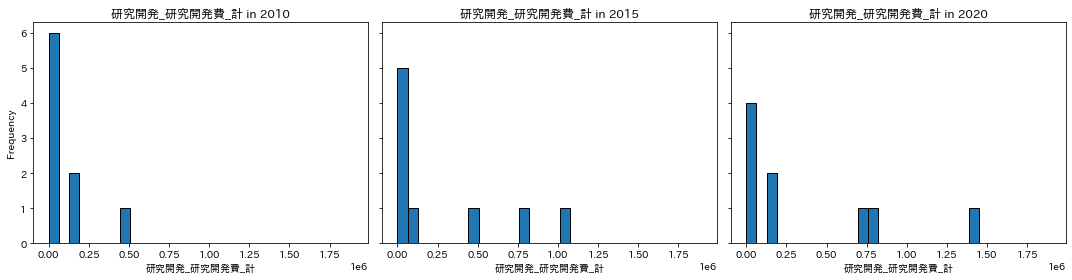

In [27]:
#製造業以外でhistogramを描く
years = [2010, 2015, 2020]
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# 製造業以外のデータを抽出
panel_cost_large_drop = panel_cost_large[~panel_cost_large['産業'].isin(['製造業'])]

# 全体の min/max を使って x 軸を統一
xmin = panel_cost_large_drop['研究開発_研究開発費_計'].min()
xmax = panel_cost_large_drop['研究開発_研究開発費_計'].max()

# 各年ごとにヒストグラムを描画
for i, year in enumerate(years):
    subset = panel_cost_large_drop[panel_cost_large_drop['year'] == year]
    
    axes[i].hist(subset['研究開発_研究開発費_計'], bins=30, edgecolor='black', range=(xmin, xmax))
    axes[i].set_title(f'研究開発_研究開発費_計 in {year}')
    axes[i].set_xlabel('研究開発_研究開発費_計')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
panel_cost.columns

Index(['産業', '企業数', '研究開発_売上高（百万円）', '研究開発_研究開発費_計', '研究開発_研究開発費_自社研究開発費（百万円）',
       '研究開発_研究開発費_委託研究開発費（百万円）',
       '研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）',
       '研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）', '研究開発_売上高研究開発費比率（％）',
       '研究開発_受託研究費（百万円）', '研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）',
       '研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）', '研究開発投資_企業数',
       '研究開発投資_当期取得額（百万円）', '能力開発_企業数', '能力開発_能力開発費（百万円）', 'year'],
      dtype='object')

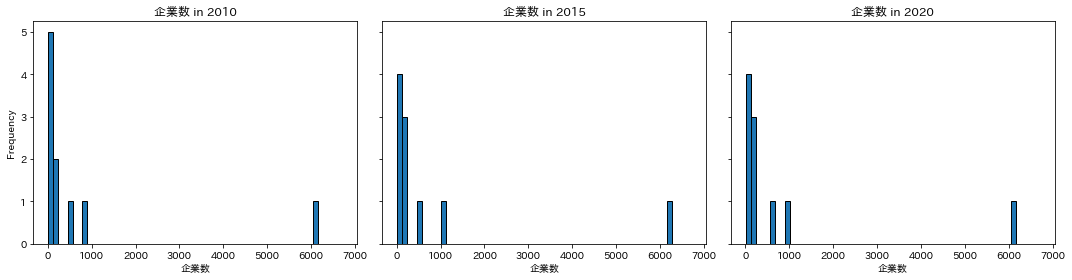

In [29]:
years = [2010, 2015, 2020]
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# 全体の min/max を使って x 軸を統一
xmin = panel_cost_large['企業数'].min()
xmax = panel_cost_large['企業数'].max()

# 各年ごとにヒストグラムを描画
for i, year in enumerate(years):
    subset = panel_cost_large[panel_cost_large['year'] == year]
    
    axes[i].hist(subset['企業数'], bins=60, edgecolor='black', range=(xmin, xmax))
    axes[i].set_title(f'企業数 in {year}')
    axes[i].set_xlabel('企業数')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

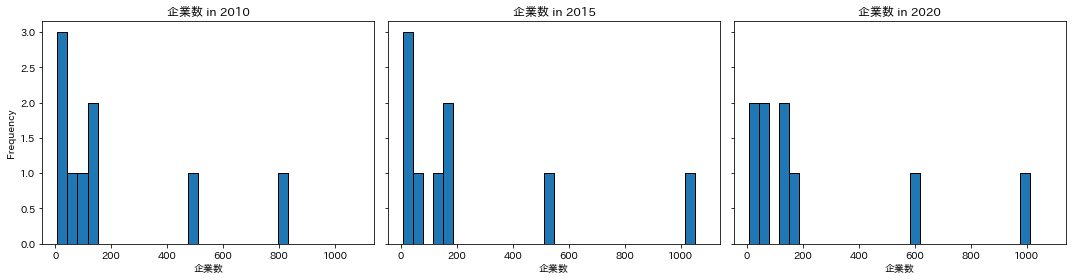

In [30]:
#製造業以外でhistogramを描く
years = [2010, 2015, 2020]
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# 製造業以外のデータを抽出
panel_cost_large_drop = panel_cost_large[~panel_cost_large['産業'].isin(['製造業'])]

# 全体の min/max を使って x 軸を統一
xmin = panel_cost_large_drop['企業数'].min()
xmax = panel_cost_large_drop['企業数'].max()

# 各年ごとにヒストグラムを描画
for i, year in enumerate(years):
    subset = panel_cost_large_drop[panel_cost_large_drop['year'] == year]
    
    axes[i].hist(subset['企業数'], bins=30, edgecolor='black', range=(xmin, xmax))
    axes[i].set_title(f'企業数 in {year}')
    axes[i].set_xlabel('企業数')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

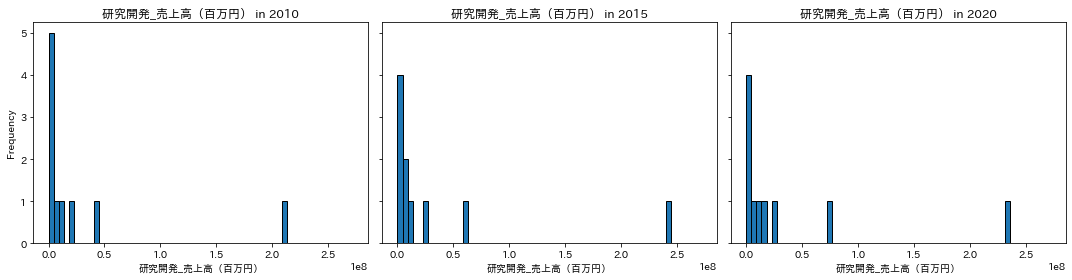

In [31]:
years = [2010, 2015, 2020]
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# 全体の min/max を使って x 軸を統一
xmin = panel_cost_large['研究開発_売上高（百万円）'].min()
xmax = panel_cost_large['研究開発_売上高（百万円）'].max()

# 各年ごとにヒストグラムを描画
for i, year in enumerate(years):
    subset = panel_cost_large[panel_cost_large['year'] == year]
    
    axes[i].hist(subset['研究開発_売上高（百万円）'], bins=60, edgecolor='black', range=(xmin, xmax))
    axes[i].set_title(f'研究開発_売上高（百万円） in {year}')
    axes[i].set_xlabel('研究開発_売上高（百万円）')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

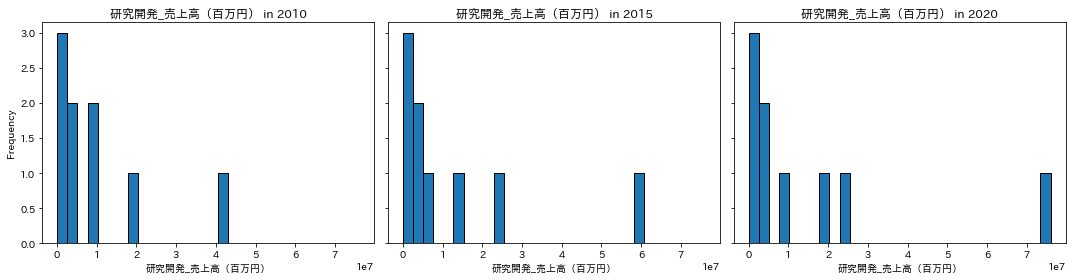

In [32]:
#製造業以外でhistogramを描く
years = [2010, 2015, 2020]
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# 製造業以外のデータを抽出
panel_cost_large_drop = panel_cost_large[~panel_cost_large['産業'].isin(['製造業'])]

# 全体の min/max を使って x 軸を統一
xmin = panel_cost_large_drop['研究開発_売上高（百万円）'].min()
xmax = panel_cost_large_drop['研究開発_売上高（百万円）'].max()

# 各年ごとにヒストグラムを描画
for i, year in enumerate(years):
    subset = panel_cost_large_drop[panel_cost_large_drop['year'] == year]
    
    axes[i].hist(subset['研究開発_売上高（百万円）'], bins=30, edgecolor='black', range=(xmin, xmax))
    axes[i].set_title(f'研究開発_売上高（百万円） in {year}')
    axes[i].set_xlabel('研究開発_売上高（百万円）')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [33]:
print('研究開発_売上高（百万円）:', panel_cost_large['研究開発_売上高（百万円）'].isna().sum())

研究開発_売上高（百万円）: 1
